<a href="https://colab.research.google.com/github/HamdiJ/Data-Science/blob/master/Classification%20Machine%20learning%20-%20Loan%20acces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Problem statement: 
 
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 
 
 



1.   List item
2.   List item



### Read in data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/datasets/train.csv", sep = ';',header = 0)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Verif NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  612 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
#describe null data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     2
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# clean numeric data
cols_numeric = ['LoanAmount','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in cols_numeric:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
# clean category data
cat_cols = ['Credit_History', 'Dependents', 'Gender', 'Married', 'Self_Employed']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode().values[0])

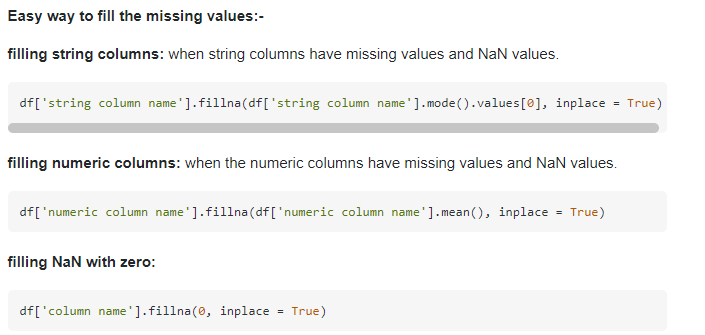

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
# drop loan id column
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [ ]:
# clean catagery data
# encode string data to numeric
from sklearn import preprocessing

string_to_int = preprocessing.LabelEncoder()   #encode your data
df = df.apply(string_to_int.fit_transform)     #fit and transform it

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,100,9,1,2,1
1,1,1,1,0,0,306,58,81,9,1,0,0
2,1,1,0,0,1,139,0,26,9,1,2,1
3,1,1,0,1,0,90,159,73,9,1,2,1
4,1,0,0,0,0,381,0,94,9,1,2,1


### Explore continuous features

In [ ]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,247.117264,78.431596,87.719870,8.526059,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,143.537853,92.194972,45.670174,1.404423,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,53.250000,9.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,244.500000,33.500000,82.000000,9.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,369.750000,152.750000,116.750000,9.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,504.000000,285.000000,203.000000,10.000000,1.000000,2.000000,1.000000


In [ ]:
df.groupby('Loan_Status').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
0,0.807292,0.588542,0.729167,0.270833,0.135417,247.781250,77.234375,91.083333,8.520833,0.572917,1.000000
1,0.822275,0.682464,0.751185,0.194313,0.132701,246.815166,78.976303,86.189573,8.528436,0.983412,1.054502


### Plot continuous features

C:\Users\NAHHAL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


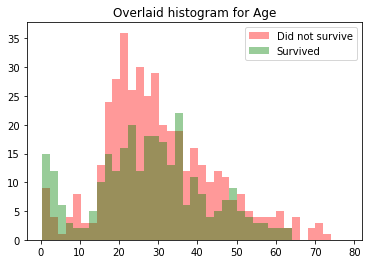

C:\Users\NAHHAL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


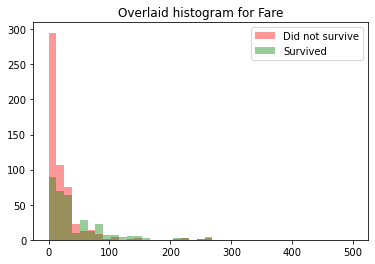

In [ ]:
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

# Cleaning continuous features

### This section focuses on cleaning up the Pclass, Age, SibSp, Parch, and Fare features.

### Fill missing for Age

In [ ]:
titanic = pd.read_csv('datasets/titanic.csv')
titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Exploring categorical features

In [ ]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [ ]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


## Cleaning the categorical features

### This section focuses on cleaning up the Sex, Cabin, and Embarked features.

In [ ]:
import numpy as np
import pandas as pd

titanic = pd.read_csv('datasets/titanic.csv')
titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


### Create indicator for `Cabin`

In [ ]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


### Convert `Sex` to numeric


In [ ]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


Drop Cabin 

In [ ]:
titanic.drop(['Cabin'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,1
2,3,1,3,1,26.0,0,0,7.9250,S,0
3,4,1,1,1,35.0,1,0,53.1000,S,1
4,5,0,3,0,35.0,0,0,8.0500,S,0


## construct a KNN and DT model 

## witch model  perform the best

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text


In [ ]:
#copy the loan df
data = df.copy()
#drop result column
data.drop(['Loan_Status'], inplace=True, axis=1)

In [ ]:
y = df['Loan_Status']
X = data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(y_train.value_counts(normalize=True))

1    0.690217
0    0.309783
Name: Loan_Status, dtype: float64


In [ ]:
from sklearn import tree
model_tree  = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [ ]:
#buil classification model
model_tree 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Entraînement du modèle d'arbre

model_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

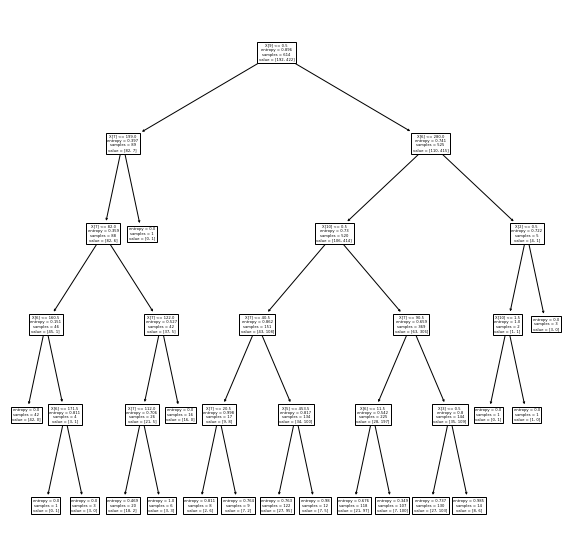

In [ ]:
# Visualisation de l'arbre
plt.figure(figsize =(10,10))
tree.plot_tree(model_tree)
plt.show()

In [ ]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(model_tree, out_file=f, filled=True)

In [ ]:
#critere de division principal
from sklearn.tree import export_text
r = export_text(model_tree, feature_names=list(X_train.columns))
print(r)

|--- Credit_History <= 0.50
|   |--- LoanAmount <= 199.00
|   |   |--- LoanAmount <= 82.00
|   |   |   |--- CoapplicantIncome <= 160.50
|   |   |   |   |--- class: 0
|   |   |   |--- CoapplicantIncome >  160.50
|   |   |   |   |--- CoapplicantIncome <= 171.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- CoapplicantIncome >  171.50
|   |   |   |   |   |--- class: 0
|   |   |--- LoanAmount >  82.00
|   |   |   |--- LoanAmount <= 122.00
|   |   |   |   |--- LoanAmount <= 112.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- LoanAmount >  112.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- LoanAmount >  122.00
|   |   |   |   |--- class: 0
|   |--- LoanAmount >  199.00
|   |   |--- class: 1
|--- Credit_History >  0.50
|   |--- CoapplicantIncome <= 280.00
|   |   |--- Property_Area <= 0.50
|   |   |   |--- LoanAmount <= 40.50
|   |   |   |   |--- LoanAmount <= 20.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- LoanAmount >  20.50
|   |   |   |   |   |--- cl

In [ ]:
#incorrect classified outcomes in the training model
from sklearn.metrics import confusion_matrix

y_pred_train=model_tree.predict(X_train)
cm=confusion_matrix(y_train, y_pred_train)
print(cm)

[[ 98  73]
 [ 17 364]]


In [ ]:
cm.ravel()

array([ 98,  73,  17, 364])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train, )

0.8369565217391305

In [ ]:
#load the test data
df_test = pd.read_csv("/content/drive/MyDrive/datasets/test.csv", sep = ',',header = 0)
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
# clean numeric data
cols_numeric = ['LoanAmount','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in cols_numeric:
    df_test[col].fillna(df_test[col].mean(), inplace=True)
# clean category data
cat_cols = ['Credit_History', 'Dependents', 'Gender', 'Married', 'Self_Employed']
for col in cat_cols:
    df_test[col] = df_test[col].fillna(df_test[col].mode().values[0])
# drop loan id column
df_test.drop(['Loan_ID'], axis = 1, inplace = True)

#encode your data
#fit and transform it
string_to_int = preprocessing.LabelEncoder()   
df_test = df_test.apply(string_to_int.fit_transform)    

In [ ]:
#check df test
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,251,0,52,11,1,2
1,1,1,1,0,0,102,43,67,11,1,2
2,1,1,2,0,0,230,67,120,11,1,2
3,1,1,2,0,0,43,110,42,11,1,2
4,1,0,0,1,0,120,0,25,11,1,2


In [ ]:
X_test = df_test

In [ ]:
#testing the classification model
y_pred=model_tree.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[10 11]
 [ 1 40]]


In [ ]:
# accurancy of the model 
accuracy_score(y_test, y_pred )

0.8064516129032258

In [ ]:
#compute the recall and precision
# How does the performance of the model on the test data, compare with that of the model on the training data
from sklearn.metrics import (precision_score, recall_score,  f1_score)
# calculate recall
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.976


In [ ]:
recall = precision_score(y_test, y_pred, average='binary')
print('precision_score: %.3f' % recall)

precision_score: 0.784
